# DV Lab 06 

### Perform the following Tasks in Seaborn

##### Import the required libraries and data from csv file "ecom_data" and perform the following tasks on it.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ecom_data = pd.read_csv("ecom_data.csv")
print(ecom_data.head())


   order_id product     category   price  quantity customer_country
0      1000     Hat  Accessories   80.88         3               US
1      1001  Tablet  Electronics  167.72         2          Germany
2      1002   Shoes     Clothing   87.59         2               US
3      1003  Tablet  Electronics  170.80         2           France
4      1004    Belt  Accessories  177.04         4               UK


#### Create a bar chart showing the average order value (price multiplied by quantity) for each customer country, colored by the dominant product category in that country.

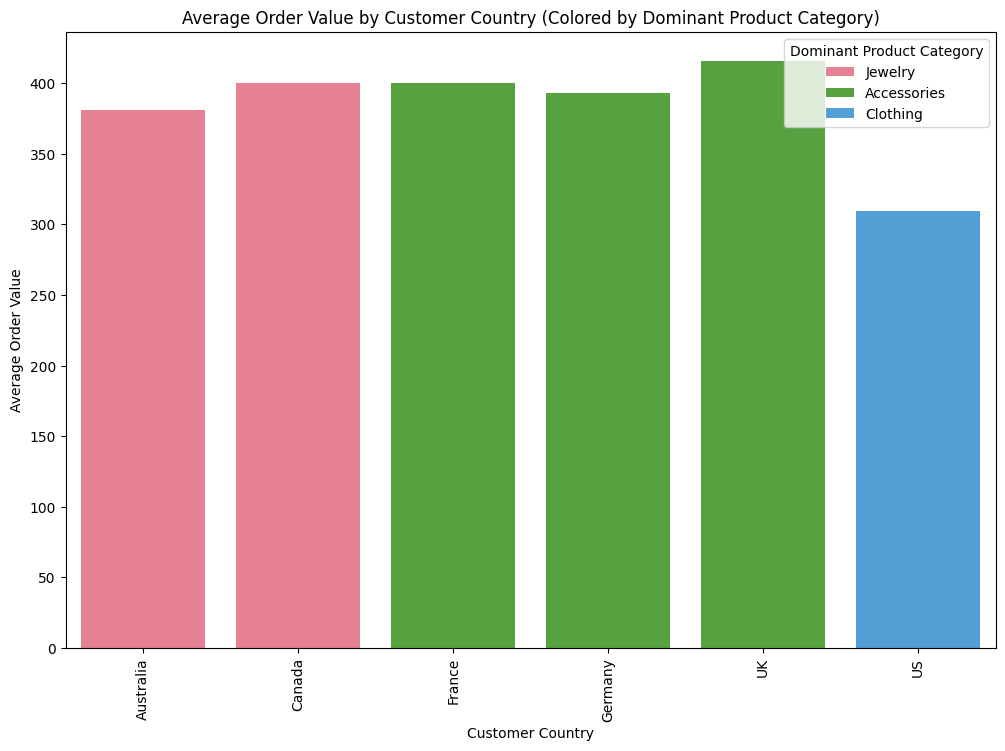

In [2]:
ecom_data['total_order_value'] = ecom_data['price'] * ecom_data['quantity']
grouped_data = ecom_data.groupby(['customer_country', 'category']).agg(avg_order_value=('total_order_value', 'mean')).reset_index()
dominant_categories = grouped_data.loc[grouped_data.groupby('customer_country')['avg_order_value'].idxmax()]

# Plot bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=dominant_categories, x='customer_country', y='avg_order_value', hue='category', palette='husl')
plt.title('Average Order Value by Customer Country (Colored by Dominant Product Category)')
plt.xlabel('Customer Country')
plt.ylabel('Average Order Value')
plt.xticks(rotation=90)
plt.legend(title='Dominant Product Category')
plt.show()


#### Explore the joint distribution of price and quantity, considering the potential interaction between these variables.

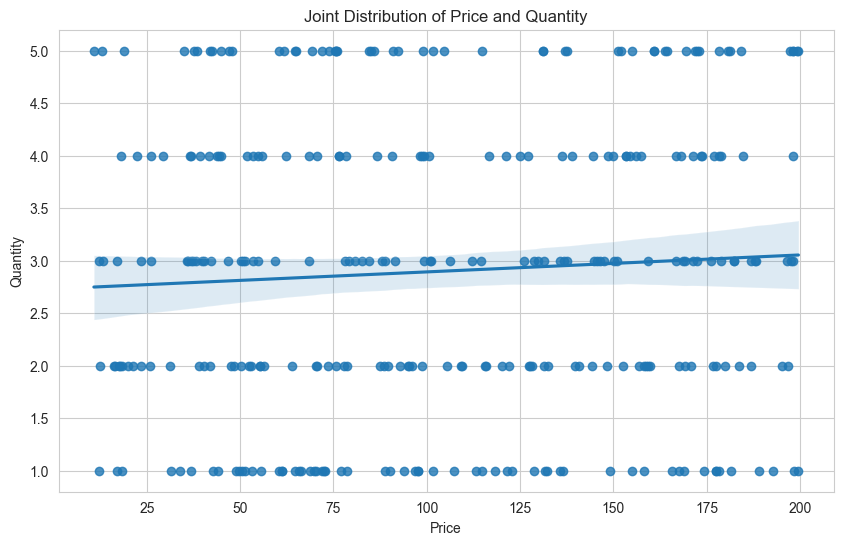

In [3]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.regplot(x='price', y='quantity', data=ecom_data)#, scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})
plt.title('Joint Distribution of Price and Quantity')
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.show()


#### Create a stacked bar chart visualizing the total quantity sold of each product category across different customer countries. Include error bars (standard deviation) to represent the variability in sales.

<Figure size 1200x800 with 0 Axes>

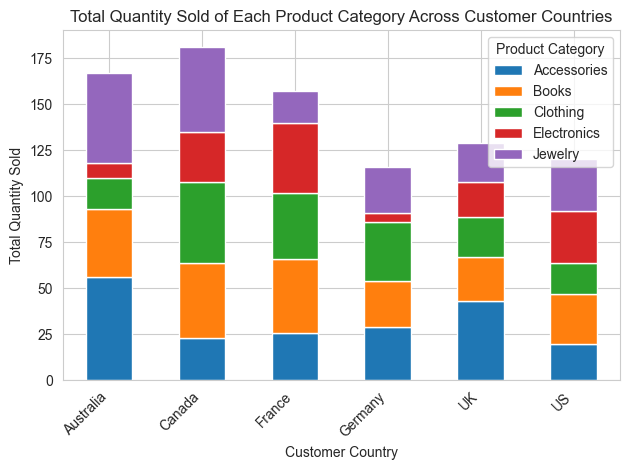

In [4]:
grouped_data = ecom_data.groupby(['customer_country', 'category'])['quantity'].sum().reset_index()
std_dev = ecom_data.groupby(['customer_country', 'category'])['quantity'].std().reset_index()
pivot_data = grouped_data.pivot(index='customer_country', columns='category', values='quantity').fillna(0)

# Plot stacked bar chart with error bars
plt.figure(figsize=(12, 8))
pivot_data.plot(kind='bar', stacked=True, yerr=std_dev.set_index(['customer_country', 'category']), capsize=5)
plt.title('Total Quantity Sold of Each Product Category Across Customer Countries')
plt.xlabel('Customer Country')
plt.ylabel('Total Quantity Sold')
plt.legend(title='Product Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### Visualize the distribution of order quantity using a kernel density estimation (KDE) plot. Highlight a specific threshold quantity (e.g., orders with more than 3 items) using a vertical line.

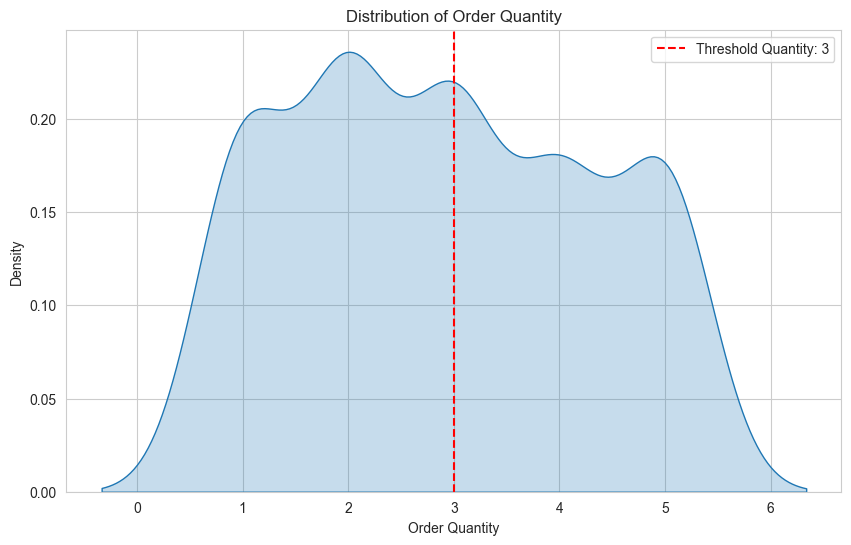

In [5]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.kdeplot(data=ecom_data['quantity'], fill=True)
plt.title('Distribution of Order Quantity')
plt.xlabel('Order Quantity')
plt.ylabel('Density')

# Highlight the threshold quantity (e.g., orders with more than 3 items) using a vertical line
threshold_quantity = 3
plt.axvline(x=threshold_quantity, color='red', linestyle='--', label=f'Threshold Quantity: {threshold_quantity}')
plt.legend()

plt.show()


#### Show the distribution of product prices across different categories, highlighting potential outliers.

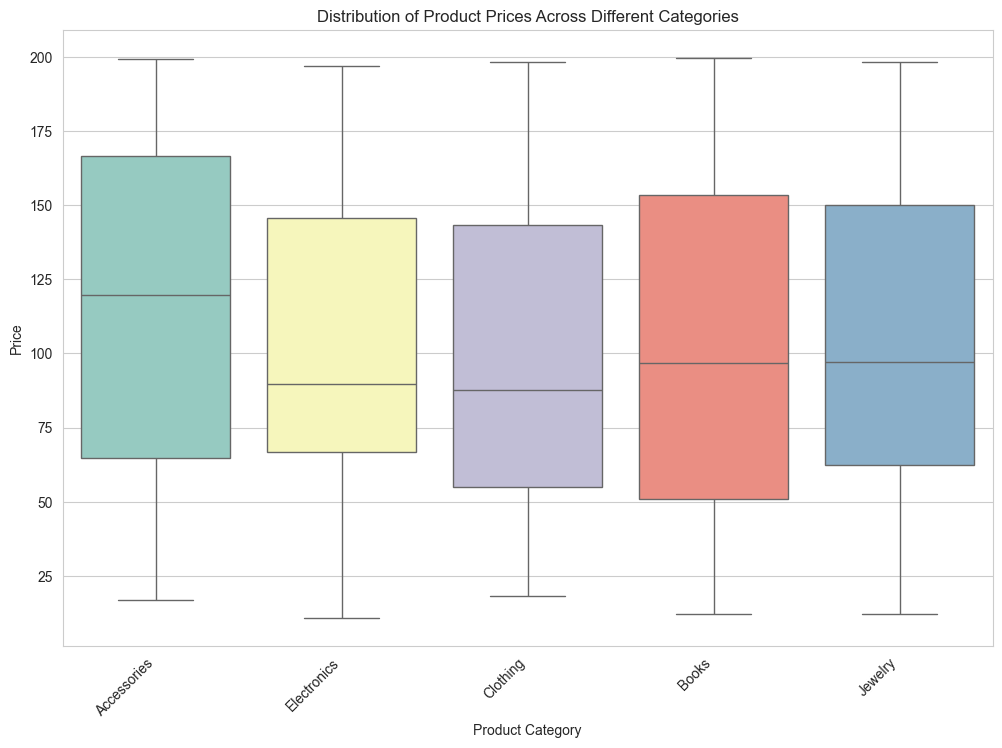

In [6]:
sns.set_style("whitegrid")

# Plot boxplot to show the distribution of product prices across different categories
plt.figure(figsize=(12, 8))
sns.boxplot(data=ecom_data, x='category', y='price', hue='category', palette='Set3', dodge=False, legend=False)
plt.title('Distribution of Product Prices Across Different Categories')
plt.xlabel('Product Category')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.show()


### Perform the following Tasks in Plotly

#### Plot the total sales per category with an interactive bar chart where users can hover over bars to see details (category and total sales). Additionally, display the cumulative total sales as a line on the same chart.

In [7]:
import plotly.graph_objs as go

total_sales_per_category = ecom_data.groupby('category')['price'].sum().reset_index()
total_sales_per_category['cumulative_sales'] = total_sales_per_category['price'].cumsum()

bar_trace = go.Bar(
    x=total_sales_per_category['category'],
    y=total_sales_per_category['price'],
    text=total_sales_per_category['price'],
    hoverinfo='x+text',
    name='Total Sales per Category'
)

line_trace = go.Scatter(
    x=total_sales_per_category['category'],
    y=total_sales_per_category['cumulative_sales'],
    mode='lines',
    name='Cumulative Total Sales',
    line=dict(color='red')
)

layout = go.Layout(
    title='Total Sales per Category with Cumulative Total Sales',
    xaxis=dict(title='Category'),
    yaxis=dict(title='Total Sales'),
    hovermode='closest'
)

# Create figure
fig = go.Figure(data=[bar_trace, line_trace], layout=layout)
fig.show()


#### Create a box plot visualizing the distribution of product prices across different categories. Add annotations to highlight outliers or interesting patterns in the data.

In [8]:
grouped_data = ecom_data.groupby('category')['price'].apply(list).reset_index()
annotations = []
box_traces = []
for index, row in grouped_data.iterrows():
    category = row['category']
    prices = row['price']
    
    trace = go.Box(
        y=prices,
        name=category,
        boxpoints='outliers',
        jitter=0.5,
        whiskerwidth=0.2,
        marker=dict(
            size=4
        ),
        line=dict(width=1),
    )
    box_traces.append(trace)
    
    outliers = [price for price in prices if price > 1.5 * max(prices)]
    for outlier in outliers:
        annotations.append(dict(x=category, y=outlier, text=f'Outlier: {outlier}', showarrow=True, arrowhead=1, ax=0, ay=-40))

layout = go.Layout(
    title='Distribution of Product Prices Across Different Categories',
    xaxis=dict(title='Category'),
    yaxis=dict(title='Price'),
    showlegend=False,
    annotations=annotations
)

# Create figure
fig = go.Figure(data=box_traces, layout=layout)
fig.show()


#### Visualize the average order value (price multiplied by quantity) and total quantity sold per category using a grouped bar chart with separate y-axes for each metric.

In [9]:
grouped_data = ecom_data.groupby('category').agg(
    avg_order_value=('price', 'mean'),  # Mean price
    total_quantity_sold=('quantity', 'sum')  # Calculate sum of quantity
).reset_index()

grouped_data['total_order_value'] = grouped_data['avg_order_value'] * grouped_data['total_quantity_sold']

avg_order_value_trace = go.Bar(
    x=grouped_data['category'],
    y=grouped_data['avg_order_value'],
    name='Average Order Value',
    yaxis='y1'  
)

total_quantity_sold_trace = go.Bar(
    x=grouped_data['category'],
    y=grouped_data['total_quantity_sold'],
    name='Total Quantity Sold',
    yaxis='y2'  
)

layout = go.Layout(
    title='Average Order Value and Total Quantity Sold per Category',
    xaxis=dict(title='Category'),
    yaxis=dict(title='Average Order Value', side='left', rangemode='tozero'),
    yaxis2=dict(title='Total Quantity Sold', side='right', overlaying='y', rangemode='tozero'),
    legend=dict(x=1.1, y=1)
)

# Create figure
fig = go.Figure(data=[avg_order_value_trace, total_quantity_sold_trace], layout=layout)
fig.show()


#### Create an animated scatter plot visualizing the relationship between product price and quantity sold. Implement brushing functionality to allow users to select a range of data points on the plot and see the corresponding distribution in a separate histogram.

In [10]:
import plotly.express as px

scatter_plot = px.scatter(ecom_data, x='price', y='quantity', animation_frame='category', 
                          range_x=[ecom_data['price'].min(), ecom_data['price'].max()], 
                          range_y=[ecom_data['quantity'].min(), ecom_data['quantity'].max()],
                          labels={'price': 'Product Price', 'quantity': 'Quantity Sold', 'category': 'Category'},
                          title='Product Price vs Quantity Sold',
                          hover_name='category')

scatter_plot.update_traces(selected=dict(marker=dict(color='red', opacity=0.6)),
                            unselected=dict(marker=dict(opacity=0.1)))

histogram = px.histogram(ecom_data, x='price', y='quantity', marginal='rug',
                          labels={'price': 'Product Price', 'quantity': 'Quantity Sold'},
                          title='Distribution of Product Price vs Quantity Sold')

# Combine scatter plot and histogram
scatter_plot.add_trace(histogram.data[0])
scatter_plot.show()


#### Create a stacked bar chart showing the total quantity sold for each product category across different customer countries. Include tooltips that display the category name, country name, and total quantity when hovering over a bar segment.

In [11]:
grouped_data = ecom_data.groupby(['category', 'customer_country'])['quantity'].sum().reset_index()
fig = go.Figure()

for category in grouped_data['category'].unique():
    category_data = grouped_data[grouped_data['category'] == category]
    fig.add_trace(go.Bar(
        x=category_data['customer_country'],
        y=category_data['quantity'],
        name=category,
        hovertemplate='Category: %{text}<br>Country: %{x}<br>Total Quantity: %{y}',
        text=category_data['category']
    ))

fig.update_layout(
    title='Total Quantity Sold for Each Product Category Across Different Customer Countries',
    xaxis=dict(title='Customer Country'),
    yaxis=dict(title='Total Quantity Sold'),
    barmode='stack'
)

# Show plot
fig.show()
